In [2]:
import numpy as np
import pandas as pd
#import relevant libraries

In [3]:
dataframe= pd.read_csv("train.csv")  #using pandas to read in training set of titanic data

Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class/Socio-economic status	1 = 1st (Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

In [4]:
dataframe.dtypes #check data type of each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
dataframe.describe() #summary of data in entire dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataframe.columns.values #.tolist() 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
dataframe.isnull().sum() #find the NaN values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
total  = len(dataframe) # check length of data ; 
totalS = len(dataframe.loc[dataframe['Survived']==1])
totalNS = len(dataframe.loc[dataframe['Survived']==0])

In [9]:
totalS/total *100 #percentage of Survivors

38.38383838383838

I believe Age is going to be a predictor of Survival and so need to sort out the NaN vals.

Age & Fare may be better to band them into ranges.

Sex is a good indicator of Survival - need to convert to binary numbers.

Embarked may be a good indicator again need to convert to number

Pclass as a proxy for social class will also be a good indicator of Survival

SibSp & Parch will need to be investigate - possiblity to add them together - likelihood of being in a group vs solo?

Name - could split into title and surname as possible indicators of class and family travelling together

Cabin Number & Ticket are possibl not going to be good indicators of Survival from a survey of the data in those cols


In [10]:
# Replace all NaN values in the Age column with the mean value
mean_age = int(dataframe["Age"].mean())
dataframe["Age"] = dataframe["Age"].fillna(mean_age)

In [11]:
dataframe.loc[dataframe['Survived'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            342 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Cabin          136 non-null object
Embarked       340 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


In [12]:
dataframe.loc[dataframe['Survived'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    549 non-null int64
Survived       549 non-null int64
Pclass         549 non-null int64
Name           549 non-null object
Sex            549 non-null object
Age            549 non-null float64
SibSp          549 non-null int64
Parch          549 non-null int64
Ticket         549 non-null object
Fare           549 non-null float64
Cabin          68 non-null object
Embarked       549 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 55.8+ KB


In [13]:
df = dataframe.drop(['Cabin', 'Ticket', 'PassengerId'], axis =1 ) #not relevant to Survival, a lot of repitition & null values

In [14]:
#df["Age"] = df["Age"].fillna(mean_age)

In [15]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Graphing Data

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.mlab as mlab
# need to tell IPython to display plots within the notebook
%matplotlib inline
# this is not strictly necessary, it just improves the style of the Matplotlib plots
matplotlib.style.use("ggplot")

#Histogram of different variables to see if relevant to Survival

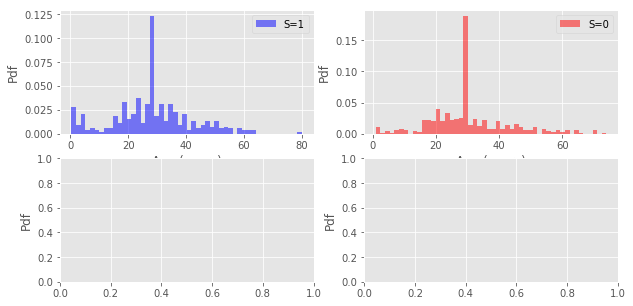

In [17]:
num_bins = 50
row = 2
col = 2
fig, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize = (10,5))

# the histogram of the data
#normed = True, n is the counts normalized to form a probability density - n/len(x) dbin i.e. integral of hist will be 1
#AGE

axs[0,0].hist((dataframe.loc[dataframe['Survived'] == 1]['Age']), bins=num_bins, 
                            normed = True, facecolor='blue', alpha=0.5, histtype="bar")
axs[0,0].set_xlabel('Age (years)')
axs[0,0].legend(["S=1"])
axs[0,1].hist((dataframe.loc[dataframe['Survived'] == 0]['Age']), bins=num_bins, 
                            normed = True, facecolor='red', alpha=0.5, histtype="bar")
axs[0,1].legend(["S=0"])
axs[0,1].set_xlabel('Age (years)')


for i in range(0,row):
    for j in range(0,col):
        axs[i,j].set_ylabel('Pdf')
        
plt.show()

In [18]:
import seaborn as sns # option 2 for graphing - better for pandas df

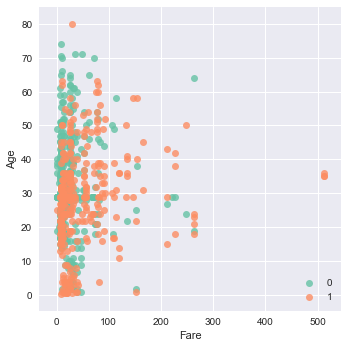

In [19]:
sns.lmplot('Fare', 'Age', data = df, fit_reg=False, hue = 'Survived', palette = 'Set2', legend = False)
plt.legend(loc = 'lower right')

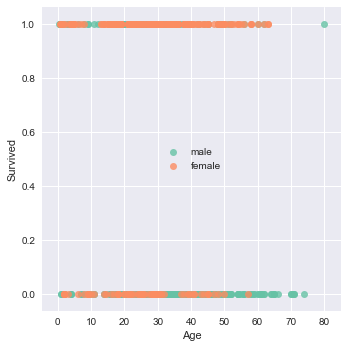

In [20]:
sns.lmplot('Age', 'Survived', data = df, fit_reg=False, hue = 'Sex', palette = 'Set2', legend = False)
plt.legend(loc = 'center')

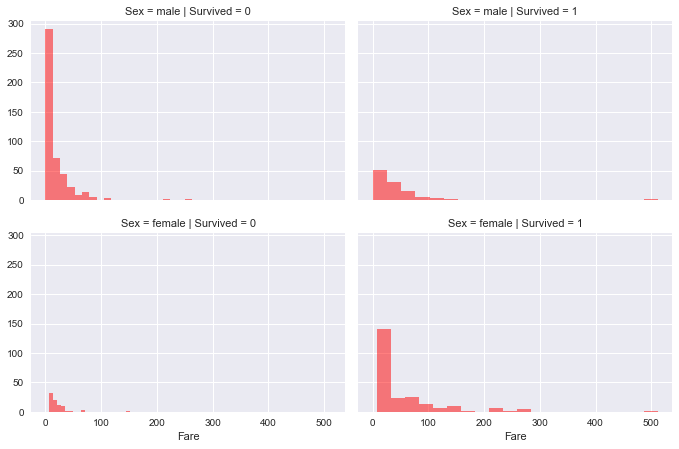

In [21]:
g = sns.FacetGrid(dataframe, col='Survived', row = 'Sex', size = 3.2, aspect = 1.5)
g.map(plt.hist, 'Fare' ,alpha = 0.5, bins = 20,  facecolor = 'red')

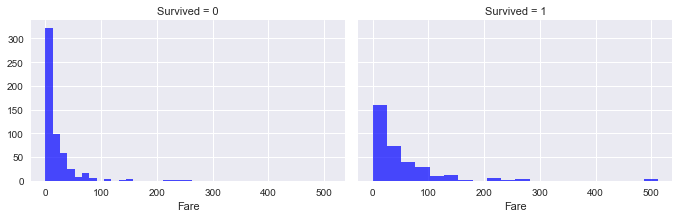

In [72]:
g = sns.FacetGrid(dataframe, col='Survived', size = 3.2, aspect = 1.5)
g.map(plt.hist, 'Fare' ,alpha = 0.7, bins = 20, facecolor = 'blue')

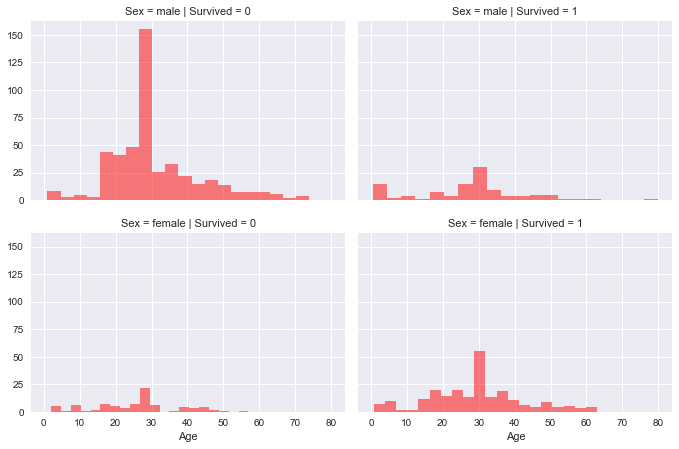

In [23]:
g = sns.FacetGrid(dataframe, col='Survived', row = 'Sex', size = 3.2, aspect = 1.5)
g.map(plt.hist, 'Age', alpha = 0.5, bins=20, facecolor = 'red')

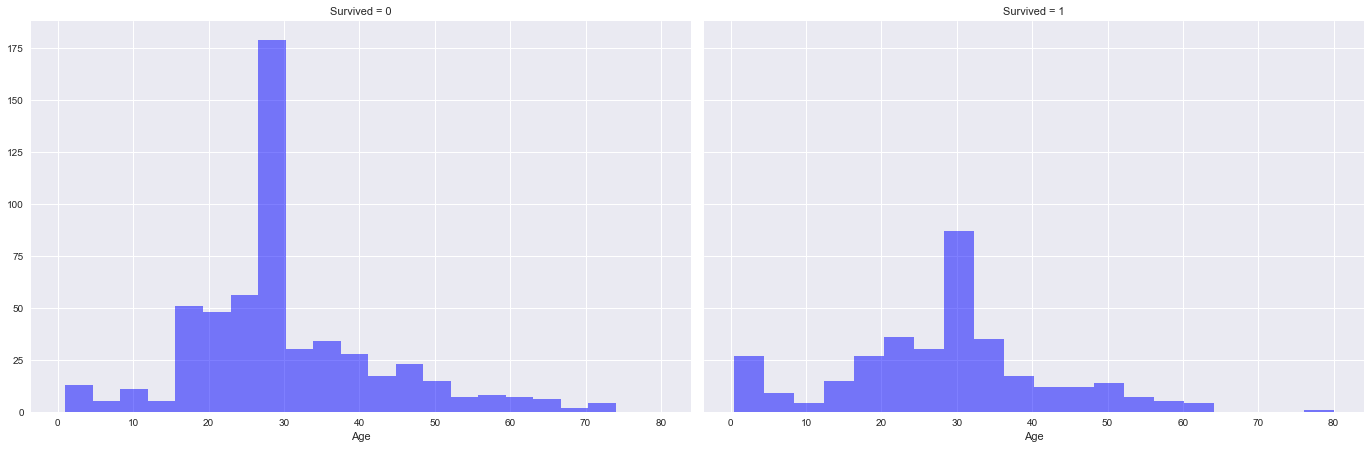

In [55]:
g = sns.FacetGrid(dataframe, col='Survived', size = 6.4, aspect = 1.5)
g.map(plt.hist, 'Age', alpha = 0.5, bins=20, facecolor = 'blue')

In [79]:
df["Age"].describe()

count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [80]:
(dfS["Age"].max()-dfS["Age"].min())/20

3.9790000000000001

In [81]:
#(df.loc[(df["Age"] > 0) & (df["Age"] < 5) & (df["Survived"] == 1)])

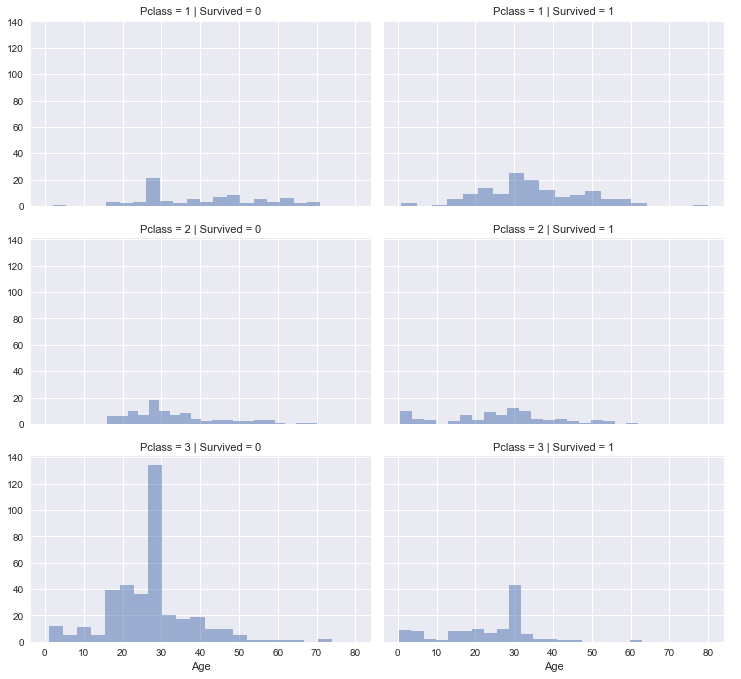

In [25]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [26]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [28]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [29]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [30]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [31]:
#strip out the Title of the person from Name

t1= []
for i in range(0,total):
    x = df['Name'][i].split('.')
    y = x[0].split(',')
    t1.append(y[1])


In [32]:
#strip out the Surname of the person from Name

t2= []
for i in range(0,total):
    a = df['Name'][i].split(',')
    t2.append(a[0])

In [33]:
title = pd.Series(t1)
sname = pd.Series(t2)

In [34]:
title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Lady              1
 Mme               1
 Ms                1
 Don               1
 Jonkheer          1
 the Countess      1
 Sir               1
 Capt              1
dtype: int64

In [35]:
sname.value_counts().nlargest(20)

Andersson    9
Sage         7
Johnson      6
Carter       6
Skoog        6
Panula       6
Goodwin      6
Rice         5
Fortune      4
Williams     4
Baclini      4
Harper       4
Palsson      4
Smith        4
Brown        4
Harris       4
Asplund      4
Ford         4
Lefebre      4
Hart         4
dtype: int64

In [36]:
#df['Name'] = sname #replace Name with just the Surname
df = df.drop(['Name'], axis =1 )

In [37]:
df['Title'] = title

In [38]:
df[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [39]:
df[["Title", "Age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Title,Age
0,Capt,70.000000
1,Col,58.000000
15,Sir,49.000000
6,Major,48.500000
5,Lady,48.000000
14,Rev,43.166667
3,Dr,40.142857
2,Don,40.000000
4,Jonkheer,38.000000
12,Mrs,34.960000


In [40]:
#Female Titles
df["Title"].loc[df["Sex"] == "female"].value_counts()

 Miss            182
 Mrs             125
 Mlle              2
 Ms                1
 Dr                1
 Mme               1
 Lady              1
 the Countess      1
Name: Title, dtype: int64

In [41]:
#Male Titles
df["Title"].loc[df["Sex"] == "male"].value_counts()

 Mr          517
 Master       40
 Rev           6
 Dr            6
 Major         2
 Col           2
 Sir           1
 Don           1
 Jonkheer      1
 Capt          1
Name: Title, dtype: int64

In [42]:
df[["Title", "Age"]].groupby(['Title'], as_index=False).describe().sort_values(by = [('Age', 'mean')], ascending = False)

Age                                                       
    count       mean        std    min    25%   50%    75%   max
0     1.0  70.000000        NaN  70.00  70.00  70.0  70.00  70.0
1     2.0  58.000000   2.828427  56.00  57.00  58.0  59.00  60.0
15    1.0  49.000000        NaN  49.00  49.00  49.0  49.00  49.0
6     2.0  48.500000   4.949747  45.00  46.75  48.5  50.25  52.0
5     1.0  48.000000        NaN  48.00  48.00  48.0  48.00  48.0
14    6.0  43.166667  13.136463  27.00  31.50  46.5  53.25  57.0
3     7.0  40.142857  12.019825  23.00  30.50  44.0  49.50  54.0
2     1.0  40.000000        NaN  40.00  40.00  40.0  40.00  40.0
4     1.0  38.000000        NaN  38.00  38.00  38.0  38.00  38.0
12  125.0  34.960000  10.883103  14.00  29.00  33.0  42.00  63.0
16    1.0  33.000000        NaN  33.00  33.00  33.0  33.00  33.0
11  517.0  31.592843  11.237400  11.00  25.00  29.0  35.00  80.0
13    1.0  28.000000        NaN  28.00  28.00  28.0  28.00  28.0
10    1.0  24.000000        NaN  24.00  24.00  24.0  24.00  24.0
9     2.0  24.000000   0.000000  24.00  24.00  24.0  24.00  24.0
8   182.0  23.203297  11.979806   0.75  16.00  24.0  29.00  63.0
7    40.0   7.016750   8.175100   0.42   1.75   4.0   9.00  29.0

In [43]:
# Group certain values by how common/uncommon they are - 
# the Countess, Lady unusual female titles
# Major, Col, Dr, Jonkheer, Rev, Capt, Don, Sir unusual  titles (for the time)
# Master indicates a male child (greater chance to survive
# Mlle, Ms and Miss are all similar titles indicate a young unmarried woman
# Mme and Mrs indicate married woman
#Dr applies to men and women - leave as own title

df["Title"] = df["Title"].replace([" Ms" , " Mlle"] , " Miss")
df["Title"] = df["Title"].replace([" Mme"], " Mrs")
df["Title"] = df['Title'].replace([" Capt", " Jonkheer"," Sir", " Major" , " Col" , " the Countess", " Lady" ," Don",
                                  " Rev", " Dr"], " Rare")


In [44]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [47]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,male,27.0,0,0,13.00,S,Rare
887,1,1,female,19.0,0,0,30.00,S,Miss
888,0,3,female,29.0,1,2,23.45,S,Miss
889,1,1,male,26.0,0,0,30.00,C,Mr
890,0,3,male,32.0,0,0,7.75,Q,Mr


In [82]:
df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000
